In [7]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


In [8]:
import sys
sys.path.append('/content/drive/MyDrive/image_recongnition_cnn_cifar')



In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from models.transfer_learning_ResNet import ResNet50_pretrained
from utils.train_eval import train_eval_model
from utils.plot_metric import plot_metric
import numpy as np

In [10]:
model =ResNet50_pretrained(
    hidden_features=16,
    num_classes=10,
    dropout=0.5
)

In [11]:
epochs = 20
lr = 1e-4
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [12]:
train_losses, train_accuracies, test_losses, test_accuracies = train_eval_model(
    model,
    optimizer=optimizer,
    criterion=criterion,
    epochs=epochs,
    dataset_name='cifar10',
    img_res=32,
    batch_size=128,
    device=device
)

Epoch [1/20] - Train Loss: 1.7387 - Train Accuracy: 41.0080%
Epoch [1/20] - Test Loss: 1.0680 - Test Accuracy: 69.9800%
Epoch [2/20] - Train Loss: 1.2725 - Train Accuracy: 59.5820%
Epoch [2/20] - Test Loss: 0.8393 - Test Accuracy: 75.5600%
Epoch [3/20] - Train Loss: 1.0954 - Train Accuracy: 64.6180%
Epoch [3/20] - Test Loss: 0.7407 - Test Accuracy: 76.9300%
Epoch [4/20] - Train Loss: 0.9707 - Train Accuracy: 68.3980%
Epoch [4/20] - Test Loss: 0.6841 - Test Accuracy: 79.2700%
Epoch [5/20] - Train Loss: 0.8843 - Train Accuracy: 71.2020%
Epoch [5/20] - Test Loss: 0.6507 - Test Accuracy: 80.3400%
Epoch [6/20] - Train Loss: 0.8225 - Train Accuracy: 73.1280%
Epoch [6/20] - Test Loss: 0.6354 - Test Accuracy: 80.8000%
Epoch [7/20] - Train Loss: 0.7627 - Train Accuracy: 74.9080%
Epoch [7/20] - Test Loss: 0.6355 - Test Accuracy: 80.9400%
Epoch [8/20] - Train Loss: 0.7116 - Train Accuracy: 76.8920%
Epoch [8/20] - Test Loss: 0.6540 - Test Accuracy: 80.6600%
Epoch [9/20] - Train Loss: 0.6755 - Trai

In [13]:
train_accuracies = np.array(train_accuracies)
test_acc = np.array(test_accuracies)
epochs = np.arange(0, len(train_accuracies))

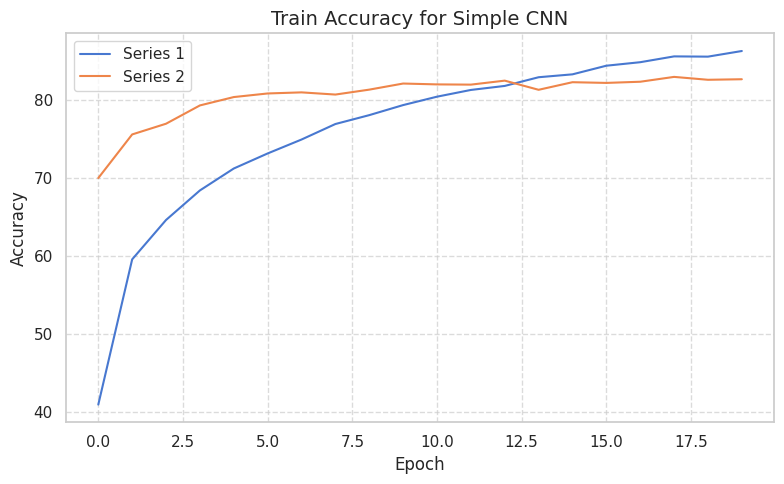

In [14]:

plot_metric(
    x=epochs,
    y_list=[train_accuracies, test_acc],
    y_label='Accuracy',
    title='Train Accuracy for Simple CNN',
    labels=None
)